# Data preparation : 1c, picture processing

In [735]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ggplot import *

import scipy
import scipy.misc
import scipy.cluster


from PIL import Image, ImageFilter
import urllib
from os import listdir
from os.path import isfile, join


## Create a list of appart ID / picture urls

In [2]:
df_listing_high_renter = pd.read_csv('data/df_listing_high_renter.csv')

In [3]:
df_listing_all = pd.read_csv('data/listings.csv')

In [510]:
col_url = [col for col in df_listing_all.columns if 'url' in col]
col_reviews = [col for col in df_listing_high_renter.columns if 'review' in col]
print col_reviews

['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'host_verification_reviews', 'good_bad_review', 'reviews_PC_1', 'reviews_PC_2', 'reviews_PC_3', 'reviews_PC_4', 'reviews_PC_5', 'reviews_PC_6', 'reviews_PC_7', 'reviews_PC_8', 'reviews_PC_9', 'reviews_PC_10', 'reviews_PC_11', 'reviews_PC_12', 'reviews_PC_13', 'reviews_PC_14', 'reviews_PC_15', 'reviews_PC_16', 'reviews_PC_17', 'reviews_PC_18', 'reviews_PC_19', 'reviews_PC_20', 'reviews_PC_21', 'reviews_PC_22', 'reviews_PC_23', 'reviews_PC_24', 'reviews_PC_25', 'reviews_PC_26', 'reviews_PC_27', 'reviews_PC_28', 'reviews_PC_29', 'reviews_PC_30', 'reviews_PC_31', 'reviews_PC_32', 'reviews_PC_33', 'reviews_PC_34', 'reviews_PC_35', 'reviews_PC_36', 'reviews_PC_37', 'reviews_PC_38', 'reviews_PC_39', 'reviews_PC_40', 'reviews_PC_41', 'revie

In [29]:
df_listing_all[df_listing_all.id==4106583][col_url].transpose()

,18254
listing_url,https://www.airbnb.com/rooms/4106583
thumbnail_url,https://a0.muscache.com/im/pictures/52427497/3...
medium_url,https://a0.muscache.com/im/pictures/52427497/3...
picture_url,https://a0.muscache.com/im/pictures/52427497/3...
xl_picture_url,https://a0.muscache.com/im/pictures/52427497/3...
host_url,https://www.airbnb.com/users/show/20998252
host_thumbnail_url,https://a0.muscache.com/im/users/20998252/prof...
host_picture_url,https://a0.muscache.com/im/users/20998252/prof...


In [32]:
df_listing_all[df_listing_all.id==4106583][col_url].xl_picture_url.values

array([ 'https://a0.muscache.com/im/pictures/52427497/3b3b7391_original.jpg?aki_policy=x_large'], dtype=object)

In [35]:
print df_listing_high_renter.shape
print df_listing_all.shape

(3199, 521)
(20576, 95)


In [41]:
df_pictures_url = pd.merge(df_listing_high_renter[['id']], df_listing_all[['id']+col_url], on='id')

In [125]:
df_pictures_url.head(9)

,id,listing_url,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_thumbnail_url,host_picture_url
0,15767215,https://www.airbnb.com/rooms/15767215,https://a0.muscache.com/im/pictures/0947cd5e-a...,https://a0.muscache.com/im/pictures/0947cd5e-a...,https://a0.muscache.com/im/pictures/0947cd5e-a...,https://a0.muscache.com/im/pictures/0947cd5e-a...,https://www.airbnb.com/users/show/39537907,https://a0.muscache.com/im/pictures/3a69d1b4-7...,https://a0.muscache.com/im/pictures/3a69d1b4-7...
1,7568544,https://www.airbnb.com/rooms/7568544,https://a0.muscache.com/im/pictures/96046046/5...,https://a0.muscache.com/im/pictures/96046046/5...,https://a0.muscache.com/im/pictures/96046046/5...,https://a0.muscache.com/im/pictures/96046046/5...,https://www.airbnb.com/users/show/39056052,https://a0.muscache.com/im/pictures/e710a9b1-6...,https://a0.muscache.com/im/pictures/e710a9b1-6...
2,16926322,https://www.airbnb.com/rooms/16926322,https://a0.muscache.com/im/pictures/f6591c6f-0...,https://a0.muscache.com/im/pictures/f6591c6f-0...,https://a0.muscache.com/im/pictures/f6591c6f-0...,https://a0.muscache.com/im/pictures/f6591c6f-0...,https://www.airbnb.com/users/show/25707959,https://a0.muscache.com/im/users/25707959/prof...,https://a0.muscache.com/im/users/25707959/prof...
3,16153479,https://www.airbnb.com/rooms/16153479,https://a0.muscache.com/im/pictures/95f34d39-0...,https://a0.muscache.com/im/pictures/95f34d39-0...,https://a0.muscache.com/im/pictures/95f34d39-0...,https://a0.muscache.com/im/pictures/95f34d39-0...,https://www.airbnb.com/users/show/105373097,https://a0.muscache.com/im/pictures/ea9eff09-4...,https://a0.muscache.com/im/pictures/ea9eff09-4...
4,16865367,https://www.airbnb.com/rooms/16865367,https://a0.muscache.com/im/pictures/485ee9b7-b...,https://a0.muscache.com/im/pictures/485ee9b7-b...,https://a0.muscache.com/im/pictures/485ee9b7-b...,https://a0.muscache.com/im/pictures/485ee9b7-b...,https://www.airbnb.com/users/show/112381310,https://a0.muscache.com/im/pictures/19e0e197-0...,https://a0.muscache.com/im/pictures/19e0e197-0...
5,4604780,https://www.airbnb.com/rooms/4604780,https://a0.muscache.com/im/pictures/57819996/8...,https://a0.muscache.com/im/pictures/57819996/8...,https://a0.muscache.com/im/pictures/57819996/8...,https://a0.muscache.com/im/pictures/57819996/8...,https://www.airbnb.com/users/show/23822141,https://a0.muscache.com/im/users/23822141/prof...,https://a0.muscache.com/im/users/23822141/prof...
6,768616,https://www.airbnb.com/rooms/768616,https://a0.muscache.com/im/pictures/24245246/0...,https://a0.muscache.com/im/pictures/24245246/0...,https://a0.muscache.com/im/pictures/24245246/0...,https://a0.muscache.com/im/pictures/24245246/0...,https://www.airbnb.com/users/show/4054647,https://a0.muscache.com/im/users/4054647/profi...,https://a0.muscache.com/im/users/4054647/profi...
7,14542554,https://www.airbnb.com/rooms/14542554,https://a0.muscache.com/im/pictures/a8473a20-b...,https://a0.muscache.com/im/pictures/a8473a20-b...,https://a0.muscache.com/im/pictures/a8473a20-b...,https://a0.muscache.com/im/pictures/a8473a20-b...,https://www.airbnb.com/users/show/2227611,https://a0.muscache.com/im/pictures/5f018716-7...,https://a0.muscache.com/im/pictures/5f018716-7...
8,4119526,https://www.airbnb.com/rooms/4119526,https://a0.muscache.com/im/pictures/c04a4268-a...,https://a0.muscache.com/im/pictures/c04a4268-a...,https://a0.muscache.com/im/pictures/c04a4268-a...,https://a0.muscache.com/im/pictures/c04a4268-a...,https://www.airbnb.com/users/show/21370854,https://a0.muscache.com/im/users/21370854/prof...,https://a0.muscache.com/im/users/21370854/prof...


In [45]:
df_pictures_url.to_csv('data/high_renters_pictures_url.csv')

## Scrap all appartment pictures for high rented flats

In [85]:
def scrap_pictures(id,url):
   
    try:
        urllib.urlretrieve(url, "data/pictures/"+  str(id )+".jpg")
    except Exception as e:
        print e
        print "cannot scrap {}".format(url)


In [135]:
def check_pictures_files_is_local(list_url):
    local_files =  [f for f in listdir('data/pictures') if isfile(join('data/pictures', f))]
    local_files =[int(f.split(".")[0]) for f in local_files]
    
    server_files = [f for f in list_url if f[0] not in local_files]
    
    
    return server_files

In [137]:
list_url = df_pictures_url[['id','picture_url']].sort_values(by='id').values.tolist()
list_url = check_pictures_files_is_local(list_url)

[]


In [138]:
#for url in list_url:
 #   scrap_pictures(url[0],url[1])

## Convert pictures to numpy array

In [577]:
size = (64, 64)

### Compute contrast and brightness for each picture

In [603]:
def compute_contrast_and_brightness(pic_file) :
    pic_id = pic_file.split('.')[0]
    img = Image.open('data/pictures/'+pic_file).convert('RGB')
    img = img.resize(size, Image.ANTIALIAS) 
    img.load()
    data = np.asarray(img, dtype="int32" )
    R = data[:,:,0]
    G = data[:,:,1]
    B = data[:,:,2]
    LuminanceA = (0.2126*R) + (0.7152*G) + (0.0722*B)
    
    return np.asarray((pic_id,R.std(),G.std(),B.std(),LuminanceA.mean(),LuminanceA.std()),dtype="int32")


In [604]:
print compute_contrast_and_brightness('81081.jpg')

[81081    69    71    78   161    70]


In [605]:
def create_contrast_brightness_matrix():
    all_pics =  [f for f in listdir('data/pictures') if isfile(join('data/pictures', f))]
    
    i=0
    for pic_file in all_pics:
        
        try: 
            npdata = compute_contrast_and_brightness(pic_file)
        except Exception as e:
            print "{0} for {1}".format(e,pic_file)
            continue
        
        
        if i==0:
            
            npdata_all = npdata
            i=1
        else :
            npdata_all = np.vstack((npdata_all,npdata))
        
    return npdata_all

In [606]:
df_contrasts_brightness = pd.DataFrame(create_contrast_brightness_matrix())

cannot identify image file 'data/pictures/16543634.jpg' for 16543634.jpg


In [607]:
df_contrasts_brightness.columns =['listing_id','R_contrast','G_contrast','B_contrast','Brightness_mean','Brightness_std']

In [609]:
df_contrasts_brightness.describe()

,listing_id,R_contrast,G_contrast,B_contrast,Brightness_mean,Brightness_std
count,3.198000e+03,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,9.925138e+06,55.656973,58.884928,61.596623,137.326141,57.650719
std,5.851340e+06,11.872257,11.154216,11.891750,33.646997,10.931282
min,2.015000e+03,17.000000,18.000000,13.000000,25.000000,19.000000
25%,4.473138e+06,48.000000,52.000000,54.000000,112.000000,50.000000
50%,1.107387e+07,56.000000,59.000000,62.000000,136.000000,58.000000
75%,1.536784e+07,63.000000,66.000000,70.000000,163.000000,65.000000
max,1.810694e+07,102.000000,99.000000,103.000000,230.000000,94.000000


In [610]:
df_contrasts_brightness.to_csv('data/df_contrasts_brightness.csv', index=False)

In [617]:
df_contrasts_brightness =pd.read_csv('data/df_contrasts_brightness.csv')

In [618]:
df_contrasts_brightness=pd.merge(df_contrasts_brightness,df_listing_high_renter[['id','review_scores_rating','reviews_per_month','availability_90','price']],left_on='listing_id',right_on='id')

In [619]:
df_contrasts_brightness.corr()

,listing_id,R_contrast,G_contrast,B_contrast,Brightness_mean,Brightness_std,id,review_scores_rating,reviews_per_month,availability_90,price
listing_id,1.000000,0.023122,-0.019196,-0.071392,-0.183923,-0.009956,1.000000,0.019317,0.129788,0.073245,-0.030322
R_contrast,0.023122,1.000000,0.833788,0.618908,-0.244475,0.888134,0.023122,0.005021,-0.038424,0.018924,0.003851
G_contrast,-0.019196,0.833788,1.000000,0.853312,-0.072627,0.990135,-0.019196,0.012632,-0.045982,-0.001540,0.010355
B_contrast,-0.071392,0.618908,0.853312,1.000000,0.110067,0.840711,-0.071392,0.034120,-0.033880,-0.031066,0.037596
Brightness_mean,-0.183923,-0.244475,-0.072627,0.110067,1.000000,-0.098437,-0.183923,-0.034448,0.086411,-0.018306,0.103435
Brightness_std,-0.009956,0.888134,0.990135,0.840711,-0.098437,1.000000,-0.009956,0.014353,-0.049028,-0.001834,0.010477
id,1.000000,0.023122,-0.019196,-0.071392,-0.183923,-0.009956,1.000000,0.019317,0.129788,0.073245,-0.030322
review_scores_rating,0.019317,0.005021,0.012632,0.034120,-0.034448,0.014353,0.019317,1.000000,-0.058974,-0.125867,0.063915
reviews_per_month,0.129788,-0.038424,-0.045982,-0.033880,0.086411,-0.049028,0.129788,-0.058974,1.000000,-0.023449,-0.002224
availability_90,0.073245,0.018924,-0.001540,-0.031066,-0.018306,-0.001834,0.073245,-0.125867,-0.023449,1.000000,0.160187


In [547]:

FORMAT = 'L'

def load_image(infilename) :
    img = Image.open( infilename).convert(FORMAT)
    img = img.resize(size, Image.ANTIALIAS) 
    img.load()
    data = np.asarray(img, dtype="int32" )
    
    #save_image(data)
    data = data.reshape(1,-1)
    return data

def reconstruct_image( npdata) :
    clipped_ndata = np.asarray(np.clip(npdata,0,255), dtype="uint8")
    
    print np.array_equal(npdata,clipped_ndata)
    
    img = Image.fromarray(clipped_ndata, FORMAT )
    
    img.show()
    


data = load_image('data/pictures/81081.jpg')


In [403]:
data

array([[186, 186, 187, ..., 137, 156, 132]], dtype=int32)

In [443]:
def create_matrix_greyscale_pictures():
    all_pics =  [f for f in listdir('data/pictures') if isfile(join('data/pictures', f))]
    
    i=0
    for pic_file in all_pics:
        pic_id = pic_file.split('.')[0]
        try: 
            npdata = load_image('data/pictures/'+pic_file)
        except Exception as e:
            print "{0} for {1}".format(e,pic_file)
            continue
        npdata = np.append([pic_id],npdata)
        
        if i==0:
            
            npdata_all = npdata
            i=1
        else :
            npdata_all = np.vstack((npdata_all,npdata))
        
    return npdata_all
        

In [444]:
npdata_all = create_matrix_greyscale_pictures()
df_pictures = pd.DataFrame(npdata_all)

cannot identify image file 'data/pictures/16543634.jpg' for 16543634.jpg


In [449]:
df_pictures.shape

(3198, 4097)

In [456]:
cols = ["pix_"+ str(i) for i in range(0,df_pictures.shape[1]-1)]

In [458]:
df_pictures.columns = ['listing_id']+ cols

In [460]:
df_pictures.to_csv('data/df_pictures_listing.csv')

In [535]:
df_pictures = pd.read_csv('data/df_pictures_listing.csv',index_col=0)

In [536]:
df_pictures.head()

,listing_id,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,pix_4086,pix_4087,pix_4088,pix_4089,pix_4090,pix_4091,pix_4092,pix_4093,pix_4094,pix_4095
0,4725997,90,72,57,43,29,30,32,34,50,...,47,43,30,37,61,86,99,103,106,108
1,14159874,100,109,121,118,127,136,134,106,114,...,2,26,33,30,32,16,19,8,28,26
2,14195566,255,255,235,188,229,255,255,255,254,...,38,30,49,57,53,40,48,49,49,52
3,2751942,156,157,158,159,159,159,160,160,160,...,105,109,107,108,97,84,23,20,22,22
4,16948945,203,202,184,152,139,119,71,54,49,...,53,50,47,40,45,48,50,50,51,50


In [537]:
df_pictures = pd.merge(df_pictures,df_listing_high_renter[['id','review_scores_rating','reviews_per_month','availability_90']],left_on='listing_id',right_on='id')

In [538]:
df_pictures.head()

,listing_id,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,...,pix_4090,pix_4091,pix_4092,pix_4093,pix_4094,pix_4095,id,review_scores_rating,reviews_per_month,availability_90
0,4725997,90,72,57,43,29,30,32,34,50,...,61,86,99,103,106,108,4725997,99.0,1.65,37
1,14159874,100,109,121,118,127,136,134,106,114,...,32,16,19,8,28,26,14159874,100.0,1.00,62
2,14195566,255,255,235,188,229,255,255,255,254,...,53,40,48,49,49,52,14195566,96.0,4.77,32
3,2751942,156,157,158,159,159,159,160,160,160,...,97,84,23,20,22,22,2751942,93.0,1.26,74
4,16948945,203,202,184,152,139,119,71,54,49,...,45,48,50,50,51,50,16948945,88.0,4.34,9


[ 30  30  30 ...,  30  30 200]
78.8291542774


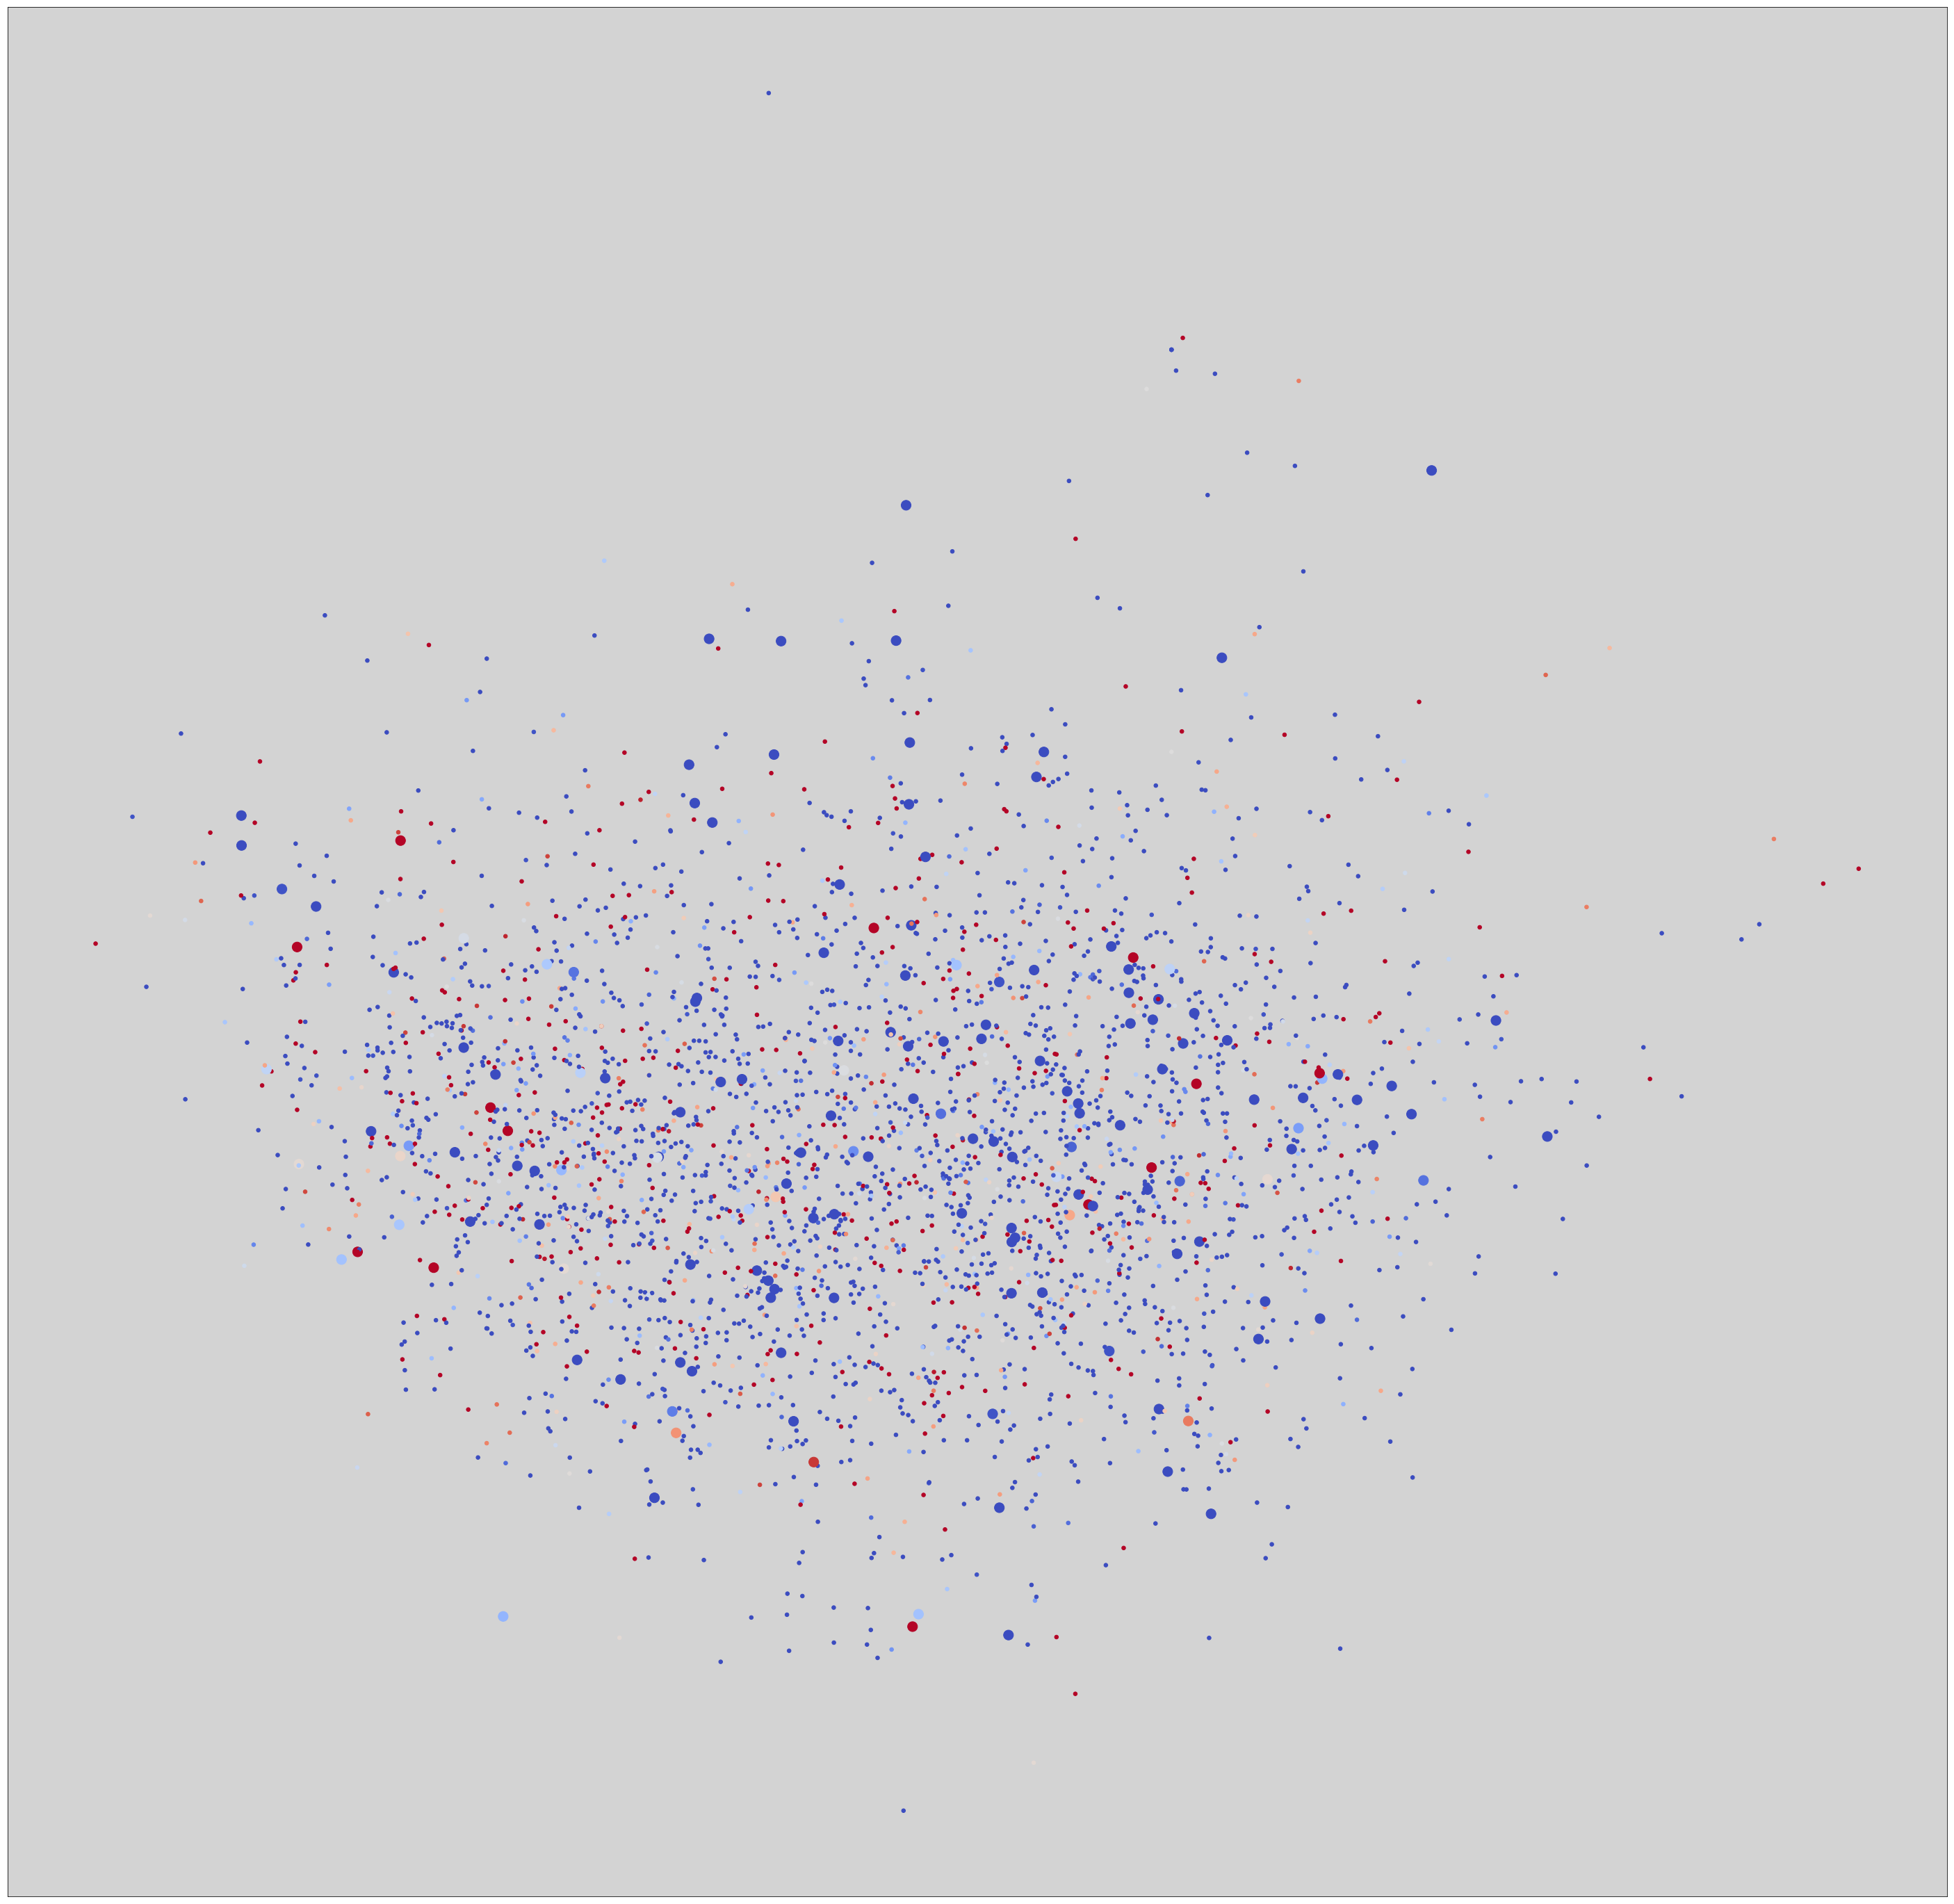

In [622]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=50)
fig, plot = plt.subplots()
plot.set_facecolor('lightgrey')
fig.set_size_inches(50, 50)
plt.prism()
y = np.random.random(10)
X_train = scale(df_pictures[cols].values)
y_train = df_pictures['reviews_per_month'].values
z_train = np.where(df_pictures['review_scores_rating']>80,30,200)

print z_train

X_transformed = pca.fit_transform(X_train)
print pca.explained_variance_ratio_.sum()*100


colors = plt.cm.coolwarm(scale(y_train))


plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=colors,s=z_train)
plot.set_xticks(())
plot.set_yticks(())

df_pictures['PC_1'] = X_transformed[:, 0]
df_pictures['PC_2'] = X_transformed[:, 2]

In [625]:
df_pictures[['review_scores_rating','reviews_per_month','availability_90','PC_1','PC_2']].corr()

,review_scores_rating,reviews_per_month,availability_90,PC_1,PC_2
review_scores_rating,1.000000,-0.058974,-0.125867,3.361284e-02,3.395258e-03
reviews_per_month,-0.058974,1.000000,-0.023449,-8.363577e-02,6.259623e-03
availability_90,-0.125867,-0.023449,1.000000,2.030847e-02,3.789411e-02
PC_1,0.033613,-0.083636,0.020308,1.000000e+00,-1.166617e-16
PC_2,0.003395,0.006260,0.037894,-1.166617e-16,1.000000e+00


In [470]:
X_transformed.shape

(3198, 2)

## Extract top 5 colours in each pictures

In [707]:


NUM_CLUSTERS = 5

def extract_top_colour_in_picture(pic_file):
    
    pic_id = np.asarray([pic_file.split('.')[0]])
     
    
    im = Image.open('data/pictures/'+pic_file)
    im = im.resize((150, 150))      # optional, to reduce time
    ar = scipy.misc.fromimage(im)
    ar = ar.astype(float)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2])

   
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    #print 'cluster centres:\n', codes

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

    index_max = scipy.argmax(counts)                    # find most frequent
    peak = codes[index_max]
    
    

    peak = peak.astype(int)
    colour = ''.join(chr(c) for c in peak).encode('hex')
    #print 'most frequent is %s (#%s) \n' % (peak, colour)
    
    i=0
    
    for c in range (NUM_CLUSTERS):
        c_centroid=  np.asarray(codes[c])
        c_counts =  np.asarray([counts[c]])
        c_hex = ''.join(chr(c) for c in c_centroid.astype(int)).encode('hex')
        c_hex = np.asarray([c_hex])
        
        if i==0:
            npdata = np.concatenate((pic_id, c_centroid,c_counts,c_hex))#.astype('int32')
            i=1
        else :
            npdata = np.hstack((npdata,np.concatenate((c_centroid,c_counts,c_hex))))#.astype('int32')))
        
    return npdata 

In [708]:
extract_top_colour_in_picture('81081.jpg')

array(['81081', '74.4795121951', '53.9414634146', '27.0980487805', '2052',
       '4a351b', '143.144551983', '103.496409616', '64.917265064', '3109',
       '8f6740', '226.658888459', '216.70817196', '209.11221921', '10548',
       'e2d8d1', '12.2218963832', '7.30694037146', '3.2981427175', '2126',
       '0c0703', '201.991791504', '182.610712087', '165.349271496', '4665',
       'c9b6a5'], 
      dtype='|S32')

In [709]:
def create_colour_clusters_matrix():
    all_pics =  [f for f in listdir('data/pictures') if isfile(join('data/pictures', f))]
    
    i=0
    for pic_file in all_pics:
        
        try: 
            npdata = extract_top_colour_in_picture(pic_file)
        except Exception as e:
            print "{0} for {1}".format(e,pic_file)
            continue
        
        if i==0:
            
            npdata_all = npdata
            i=1
        else :
            npdata_all = np.vstack((npdata_all,npdata))
        
    return npdata_all

In [710]:
df_colors_cluster = pd.DataFrame(create_colour_clusters_matrix())

index 4 is out of bounds for axis 0 with size 4 for 7891672.jpg
cannot identify image file 'data/pictures/16543634.jpg' for 16543634.jpg
index 4 is out of bounds for axis 0 with size 4 for 15880956.jpg


In [713]:
df_colors_cluster.shape

(3196, 26)

In [714]:
df_colors_cluster.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,4725997,141.698635403,144.572554296,138.247165097,5280,8d908a,108.116758933,102.128837443,88.2098641168,3891,...,182.720076482,193.778202677,200.604971319,5247,b6c1c8,47.3173852573,43.6328233658,34.3418636996,3572,2f2b22
1,14159874,92.7057716437,138.790464241,184.993099122,1577,5c8ab8,133.743443558,132.817939947,100.864690232,5123,...,28.2439379243,27.8438409311,19.6089557064,6223,1c1b13,81.2518361351,84.7685653664,64.4421413416,6289,515440
2,14195566,72.9199600798,84.3788423154,77.8073852295,5071,48544d,19.8510479042,24.5265718563,29.2836826347,2674,...,107.271832718,119.508541752,121.023780238,7326,6b7779,157.171464071,165.885897701,164.437978878,4771,9da5a4
3,2751942,54.6911671924,42.2659305994,36.8195583596,3153,362a24,206.275024534,199.606722277,188.710745829,4129,...,175.131674669,160.847082788,147.302487997,6892,afa093,246.677233429,248.557505895,247.622740372,3827,f6f8f7
4,16948945,156.81012333,131.508864337,96.1234583762,7807,9c8360,244.212780899,247.020365169,238.783005618,1437,...,175.396672504,174.945709282,165.347927612,3417,afaea5,109.458666204,86.481938173,62.2908996179,5779,6d563e


In [715]:
df_colors_cluster.columns = ['listing_id','Centroid_R_1','Centroid_G_1','Centroid_B_1','Centroid_Count_1','Centroid_hex_1',
                            'Centroid_R_2','Centroid_G_2','Centroid_B_2','Centroid_Count_2','Centroid_hex_2',
                          'Centroid_R_3','Centroid_G_3','Centroid_B_3','Centroid_Count_3','Centroid_hex_3',
                         'Centroid_R_4','Centroid_G_4','Centroid_B_4','Centroid_Count_4','Centroid_hex_4',
                           'Centroid_R_5','Centroid_G_5','Centroid_B_5','Centroid_Count_5','Centroid_hex_5']

In [717]:
cols_int = [col for col in df_colors_cluster.columns if 'hex' not in col]

In [720]:
df_colors_cluster[cols_int] = df_colors_cluster[cols_int].apply(pd.to_numeric)

In [723]:
df_colors_cluster.to_csv('data/df_colours_clusters.csv',index=False)

In [724]:
df_colors_cluster=pd.merge(df_colors_cluster,df_listing_high_renter[['id','review_scores_rating','reviews_per_month','availability_90','price']],left_on='listing_id',right_on='id')

In [730]:
df_colors_cluster.corr()[['review_scores_rating','availability_90']].sort_values(by='availability_90')

,review_scores_rating,availability_90
review_scores_rating,1.000000,-0.125836
reviews_per_month,-0.059182,-0.023410
Centroid_B_4,0.017235,-0.019328
Centroid_G_4,0.010054,-0.018775
Centroid_R_2,-0.017758,-0.018096
Centroid_G_2,-0.013181,-0.015922
Centroid_R_1,-0.030640,-0.015524
Centroid_R_4,0.001515,-0.014687
Centroid_G_3,0.037052,-0.012645
Centroid_B_3,0.036678,-0.012475


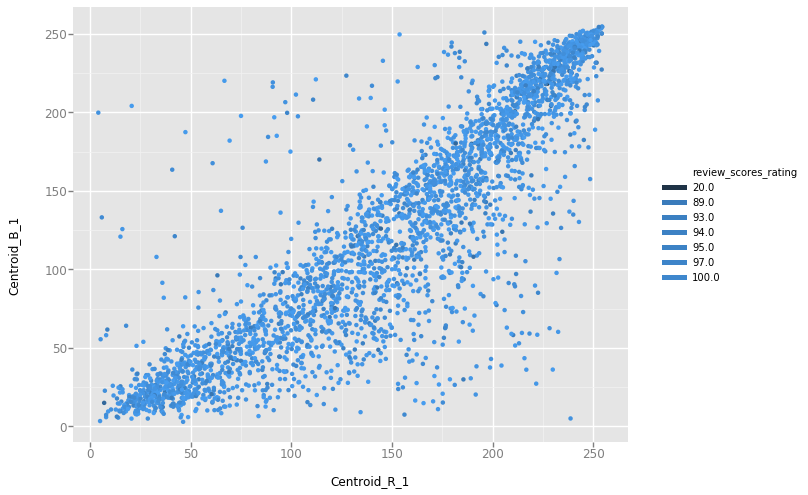

<ggplot: (8732946163857)>

In [744]:
ggplot(df_colors_cluster,aes(x = 'Centroid_R_1',y='Centroid_B_1',color='review_scores_rating'))+geom_point()

75.222151092


[]

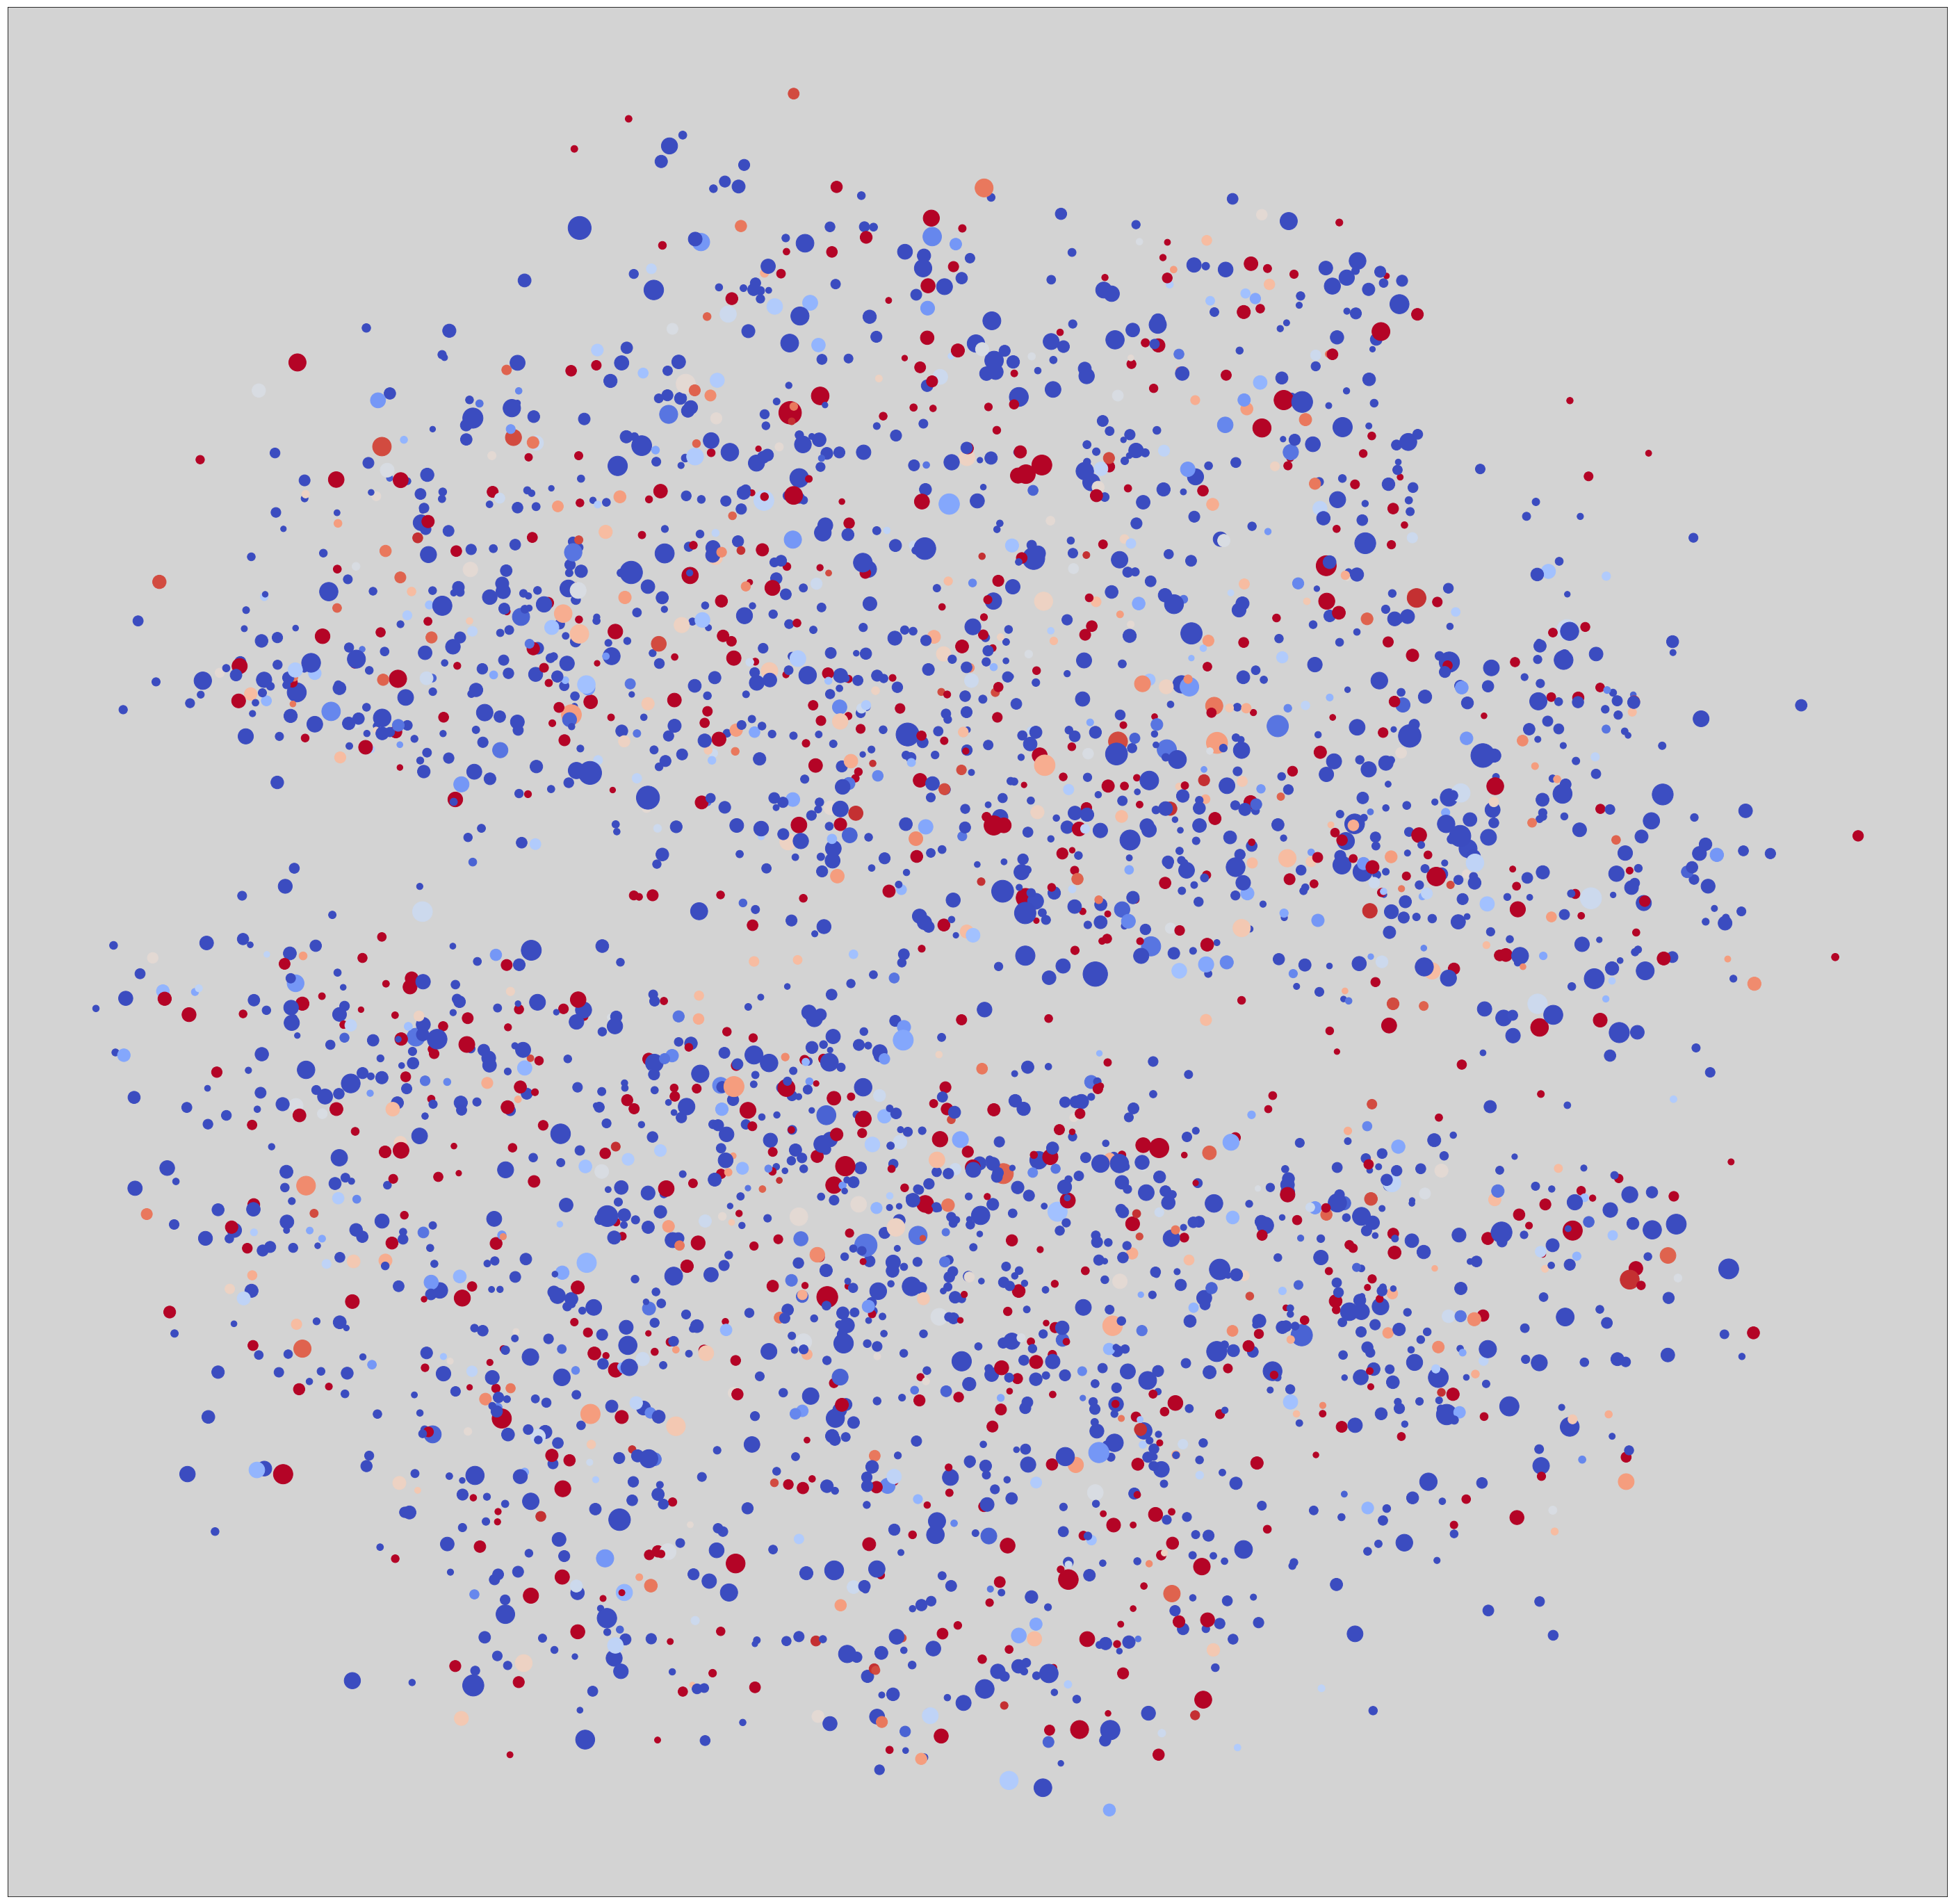

In [754]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=6)
fig, plot = plt.subplots()
plot.set_facecolor('lightgrey')
fig.set_size_inches(50, 50)
plt.prism()
y = np.random.random(10)
X_train = scale(df_colors_cluster[cols_int].values)
y_train = df_colors_cluster['availability_90'].values
z_train = df_colors_cluster['reviews_per_month']*130



X_transformed = pca.fit_transform(X_train)
print pca.explained_variance_ratio_.sum()*100


colors = plt.cm.coolwarm(scale(y_train))


plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=colors,s=z_train)
plot.set_xticks(())
plot.set_yticks(())